# CIS 5500 Final Project ETL
The following Jupyter notebook aims to clean and transform the vehicles.csv datasets into a useable format.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Mount Google Drive at appropriate location
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


In [3]:
vehicles_path = '/content/drive/My Drive/Datasets/vehicles/vehicles.csv'

In [4]:
vehicles_df = pd.read_csv(vehicles_path)

In [5]:
vehicles_df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


## Relevant Columns
Transform the datasets to get the relevant columns. Change to appropriate types.

In [6]:
# get relevant columns
cols = ['price', 'year', 'manufacturer', 'model', 'state', 'odometer', 'VIN']  # maybe cylinders and condition
vehicles_df_temp = vehicles_df[cols]
vehicles_df_temp = vehicles_df_temp.dropna()

In [7]:
# Price, Year, Manufacturer -> Make, Odometer -> Mileage
vehicles_df_temp = vehicles_df_temp.rename(columns={'price': 'Price', 'year': 'Year', 'manufacturer': 'Make', 'odometer': 'Mileage', 'model': 'Model', 'state': 'State'})

In [27]:
vehicles_df_temp.dtypes

Price        int64
Year       float64
Make        object
Model       object
State       object
Mileage    float64
VIN         object
dtype: object

In [28]:
vehicles_df_temp['Year'] = vehicles_df_temp['Year'].astype(int)
vehicles_df_temp['Mileage'] = vehicles_df_temp['Mileage'].astype(int)
vehicles_df_temp.dtypes

Price       int64
Year        int64
Make       object
Model      object
State      object
Mileage     int64
VIN        object
dtype: object

In [29]:
vehicles_df_temp['State'] = vehicles_df_temp['State'].str.upper()

## Remove duplicates
Get rid of duplicate values in VIN.

In [30]:
# check for vin duplicates
duplicated = vehicles_df_temp.duplicated(subset=['VIN'])
vehicles_df_temp[duplicated].sort_values('VIN')

,Price,Year,Make,Model,State,Mileage,VIN


In [31]:
# drop duplicate vins
vehicles_df_temp = vehicles_df_temp.drop_duplicates(subset='VIN')
vehicles_df_temp

,Price,Year,Make,Model,State,Mileage,VIN
349287,49995,1937,chevrolet,master business coupe,SC,10,00000000001157308
214547,13500,1938,dodge,d8,MN,87782,00000000030071477
407665,6995,1995,chevrolet,camaro yanase,WA,37989,000000000CF44603Y
307064,18999,1968,volkswagen,beetle,OK,99462,00000000118683018
307065,14999,1969,volkswagen,beetle,OK,53368,00000000119690287
...,...,...,...,...,...,...,...
346,98900,2001,ferrari,360 modena,AL,20187,ZFFYT53A110125703
400587,116899,2004,ferrari,360 modena spyder,WA,34123,ZFFYT53A340136996
189368,120000,2005,ferrari,360 spider,MA,35498,ZFFYT53A750139787
201859,84965,2002,ferrari,360 modena,MI,12341,ZFFYU51A020129002


## Drop Outliers
Get rid of outliers

In [32]:
# drop free cars
vehicles_df_temp = vehicles_df_temp.sort_values('Price')
vehicles_df_temp = vehicles_df_temp[vehicles_df_temp['Price'] > 0]
vehicles_df_temp

,Price,Year,Make,Model,State,Mileage,VIN
92007,1,2016,mercedes-benz,c-class,FL,47065,55SWF4JB7GU124776
93048,1,2019,dodge,charger,FL,19734,2C3CDXBG7KH711511
11325,1,2018,ford,f-150 xlt,AZ,49180,1FTEW1CGXJKE77799
99868,1,2014,mercedes-benz,cls-class,FL,45907,WDDLJ9CB8EA099959
305821,1,2013,cadillac,x ts,OK,93000,2G61P5S37D9214308
...,...,...,...,...,...,...,...
88588,304995,2021,porsche,911,DC,22,WP0CD2A97MS263705
44387,347999,2020,ferrari,f8 tributo,CA,3000,ZFF92LLA5L0257118
360604,449500,2019,ferrari,488 gtb,TN,500,ZFF79ALA7K0248037
95119,990000,2017,mercedes-benz,amg g 63,FL,4085,WDCYC7DF5HX267228


In [33]:
# drop all 0s vin
vehicles_df_temp = vehicles_df_temp[vehicles_df_temp['VIN'] != '00000000000000000'].sort_values(['VIN'])
vehicles_df_temp

,Price,Year,Make,Model,State,Mileage,VIN
349287,49995,1937,chevrolet,master business coupe,SC,10,00000000001157308
214547,13500,1938,dodge,d8,MN,87782,00000000030071477
407665,6995,1995,chevrolet,camaro yanase,WA,37989,000000000CF44603Y
307064,18999,1968,volkswagen,beetle,OK,99462,00000000118683018
307065,14999,1969,volkswagen,beetle,OK,53368,00000000119690287
...,...,...,...,...,...,...,...
346,98900,2001,ferrari,360 modena,AL,20187,ZFFYT53A110125703
400587,116899,2004,ferrari,360 modena spyder,WA,34123,ZFFYT53A340136996
189368,120000,2005,ferrari,360 spider,MA,35498,ZFFYT53A750139787
201859,84965,2002,ferrari,360 modena,MI,12341,ZFFYU51A020129002


In [34]:
# counts DC as a state
states_values = vehicles_df_temp['State'].unique()
print('size: ' + str(len(states_values)))
states_values

size: 51


array(['SC', 'MN', 'WA', 'OK', 'NH', 'NC', 'AZ', 'KS', 'NY', 'OR', 'NJ',
       'CA', 'MT', 'CT', 'ME', 'FL', 'IL', 'NE', 'TX', 'MO', 'LA', 'OH',
       'AK', 'TN', 'IA', 'VA', 'KY', 'MA', 'MI', 'NV', 'AL', 'UT', 'WI',
       'MD', 'IN', 'PA', 'CO', 'GA', 'SD', 'AR', 'HI', 'ID', 'DC', 'NM',
       'MS', 'RI', 'WV', 'DE', 'VT', 'ND', 'WY'], dtype=object)

In [35]:
manufacturer_values = vehicles_df_temp['Make'].unique()
manufacturer_values

array(['chevrolet', 'dodge', 'volkswagen', 'ford', 'toyota', 'mitsubishi',
       'nissan', 'pontiac', 'chrysler', 'volvo', 'honda', 'jeep',
       'datsun', 'lincoln', 'gmc', 'mercedes-benz', 'subaru', 'porsche',
       'mazda', 'ram', 'acura', 'mercury', 'mini', 'harley-davidson',
       'buick', 'cadillac', 'audi', 'saturn', 'hyundai', 'rover', 'bmw',
       'lexus', 'fiat', 'jaguar', 'kia', 'infiniti', 'alfa-romeo',
       'tesla', 'ferrari', 'land rover', 'aston-martin'], dtype=object)

<Axes: >

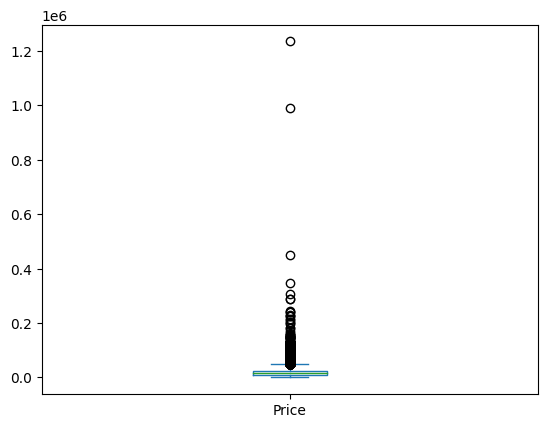

In [36]:
vehicles_df_temp['Price'].plot(kind='box')

<Axes: >

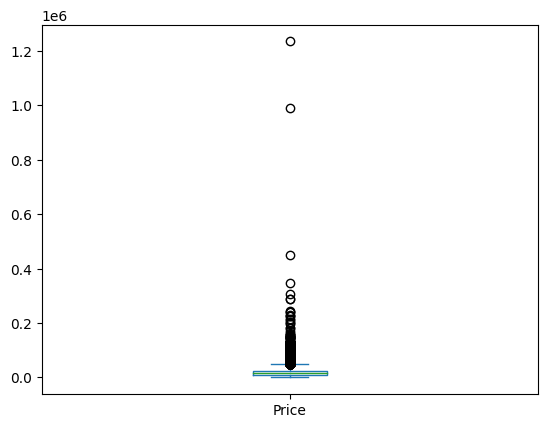

In [37]:
# vehicles_df_temp = vehicles_df_temp[vehicles_df_temp['Price'] < vehicles_df_temp['Price'].max()]
vehicles_df_temp['Price'].plot(kind='box')

In [38]:
vehicles_df_temp[vehicles_df_temp['Price'] == vehicles_df_temp['Price'].max()]

,Price,Year,Make,Model,State,Mileage,VIN
194292,1234567,2010,lincoln,mkt ecoboost,MI,85653,2LMHJ5AT1ABJ50124


In [39]:
vehicles_df_temp['Mileage'].describe()

count    1.015420e+05
mean     9.132002e+04
std      6.297913e+04
min      0.000000e+00
25%      4.227400e+04
50%      8.730650e+04
75%      1.289515e+05
max      3.000000e+06
Name: Mileage, dtype: float64

<Axes: >

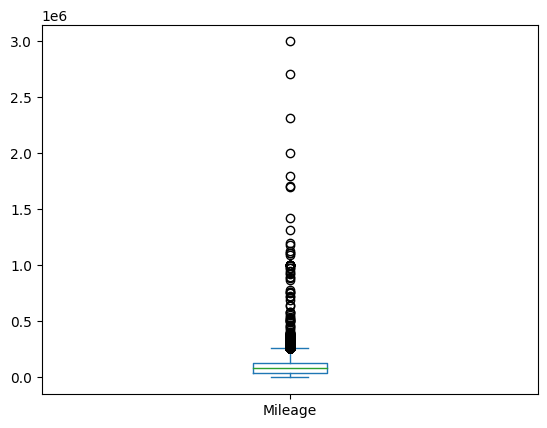

In [40]:
# vehicles_df_temp = vehicles_df_temp[vehicles_df_temp['Mileage'] < vehicles_df_temp['Mileage'].max()]
vehicles_df_temp['Mileage'].plot(kind='box')

In [54]:
vehicles_df_temp = vehicles_df_temp[vehicles_df_temp['VIN'].str.len() == 17]
vehicles_df_temp

,Price,Year,Make,Model,State,Mileage,VIN
349287,49995,1937,chevrolet,master business coupe,SC,10,00000000001157308
214547,13500,1938,dodge,d8,MN,87782,00000000030071477
407665,6995,1995,chevrolet,camaro yanase,WA,37989,000000000CF44603Y
307064,18999,1968,volkswagen,beetle,OK,99462,00000000118683018
307065,14999,1969,volkswagen,beetle,OK,53368,00000000119690287
...,...,...,...,...,...,...,...
346,98900,2001,ferrari,360 modena,AL,20187,ZFFYT53A110125703
400587,116899,2004,ferrari,360 modena spyder,WA,34123,ZFFYT53A340136996
189368,120000,2005,ferrari,360 spider,MA,35498,ZFFYT53A750139787
201859,84965,2002,ferrari,360 modena,MI,12341,ZFFYU51A020129002


<Axes: ylabel='Frequency'>

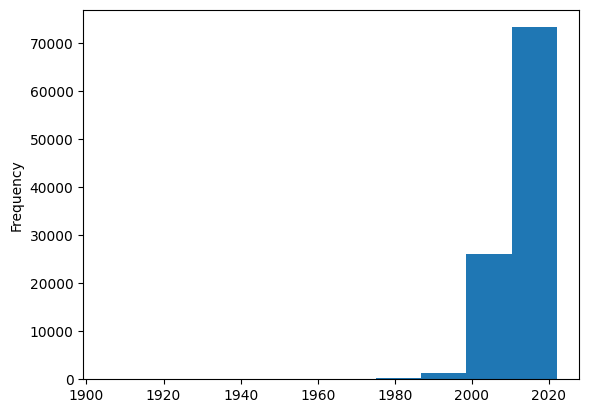

In [58]:
vehicles_df_temp['Year'].plot(kind='hist')

In [55]:
vehicles_df_temp.to_csv('vehicles_cleaned.csv')